# Astronomical Data Reduction and Analysis

<center><font size=4>David Shupe,<br>
Elise Furlan, Rahul Patel, Ben Rusholme<br><br>
IPAC<br><br>
2016-04-28

<center>
![astropy-powered](images/astropy_powered.png)

### Promised topics

* Astropy: vision, history and plans, and how JWST development fits in
* Accessing astronomical archives within Python
* Reading and manipulating tables and images
* Exploratory data analysis (visualization and statistics)
* World Coordinate Systems and coordinate handling
* Photutils for photometry

### Outline

* Vision, history and plans for Astropy
* How to read, manipulate, create and write tabular data
* Quantities and Units
* SkyCoords and how to cross-match catalogs
* How to read, manipulate, create and write FITS files
* World Coordinate System usage
* Plots of image and catalogs with APLpy
* The Ginga display toolkit and reference viewer
* Example: a simple image stacker
* Data exploration with Glue
* Exercises


### About me

* Staff scientist at IPAC since 1995 (LSST, ZTF, PTF, Herschel, Spitzer, WIRE)
* Attended first SciPy conferences at Caltech (2002-2003)
* Switched science workflow to Python in 2003
* Collaborator on Astropy
* Email me at [work](shupe@ipac.caltech.edu) or [Gmail](dave.shupe@gmail.com)
* Follow on [Github](https://github.com/stargaser) or [Twitter](http://twitter.com/stgazer)


# The Astropy Project

* A community effort to develop a core package for astronomy in Python
* Foster interoperability between Python astronomy packages
* Provide core functionality and _some_ common tools needed across astronomy
* Adhere to high standards for coding, testing and documentation
* Enable affiliated packages that can eventually be in the core

### Astropy origins

* First discussion on [Astropy mailing list](http://mail.scipy.org/pipermail/astropy) in June 2011
* First commit to [Astropy repository](https://github.com/astropy/astropy) in July 2011
* Coordination meeting at CfA in October 2011
   * Principally people from STScI and CfA
   * Also developers of astronomy packages
* First release (v0.1) in June 2012
* First long-term-support release (1.0) in February 2015
* Current coordinators are Tom Aldcroft, Kelle Cruz, Thomas Robitaille and Erik Tollerud

### How do I find out more about Astropy?

* For users:
   * Read about Astropy at [astropy.org](http://www.astropy.org) or peruse the [docs](http://docs.astropy.org)
   * Try the [Astropy Tutorials](http://www.astropy.org/astropy-tutorials/) or the [Scipy 2014 Astropy Workshop](http://astropy4scipy2014.readthedocs.org/en/latest/)
   * Report bugs and request features on the [issue tracker](https://github.com/astropy/astropy/issues)

### How do I find out more about Astropy?

* For the hard-core or cognoscenti:
   * Contribute code via [pull requests](https://github.com/astropy/astropy/pulls?q=is%3Aopen+is%3Apr)
   * View or propose major enhancements at the [Astropy Proposals for Enhancement](https://github.com/astropy/astropy/wiki/APE-Overview)
   * Join the [Astropy-dev mailing list](https://groups.google.com/forum/#!forum/astropy-dev)
   * Buy some [Astropy gear](http://fashion.astropy.org)

# Astropy core package functionality

* Units, quantities, constants
* Celestial coordinate representation and transformation
* WCS transformation
* Extensible framework for reading/writing ASCII tables
* FITS files and VO table handling
* High-level Table class with easy reading/writing
* Convolution/filtering utilities
* Cosmological calculations
* Model fitting framework
* Virtual Observatory support
* And more!

# Astropy affiliated packages


* Astronomy-related packages not in the Astropy core
* Can be:
   * Functionality under development for the core
   * More specialized functionality
   * Packages with incompatible licenses
* Adhere to Astropy coding, testing, and docs guidelines
* Use Astropy wherever possible (avoid duplication)
* Full list on [Astropy affiliated packages](http://www.astropy.org/affiliated/index.html)

__Stable affiliated packages__

* Montage-wrapper: Python interface to the Montage Astronomical Image Mosaic Engine
* Ginga: viewer and display toolkit for FITS files
* APLpy: publication-quality plots of astronomical images
* astroML: tools for machine learning and data mining in astronomy
* astroquery: online database querying
* ccdproc: reduction of optical/IR CCD data


__Affiliated packages in development__


* pyVO: access to the Virtual Observatory through Python
* photutils: photometry tools
* specutils: spectroscopic analysis utilities
* gammapy: a high-level gamma-ray astronomy data analysis package
* ccdproc: package for CCD data reductions
* imexam: a package for functionality like IRAF's `imexamine`

# Reading tabular data

### Astropy Table or Pandas?

__Benefits of Pandas__

* in wide usage outside astronomy
* inspired by R's `dataframe`
* lots of built-in statistics and data-indexing, cleaning functionality
* better integration with non-astronomy tools like Seaborn or Bokeh for plotting

__Benefits of Astropy.Table__

* strong concept of units for numerical quantities
* support for the many table formats in astronomy
* ...even handles IPAC table format
* better integration of FITS files

We'll show some of Table and Pandas today.

# Reading a catalog from Vizier/CDS

In [1]:
from astropy.table import Table
import numpy as np

Here's how to read a Vizier catalog right over the Internet!
We won't do it here because it takes nearly 90 seconds to download (100 MB table).

Instead I'll read a shortened local copy from disk. Note I'm reading only selected columns, and I'm filling some zero values with NaNs.

In [2]:
%time hermes = Table.read('./data/hermes_xmm.dat.gz', format='ascii.cds',\
                readme='./data/hermes_xmm_ReadMe',\
                include_names=['Field','2HERMES','RAdeg','DEdeg','F250','E_F250',\
                                        'F350','E_F350','F500','E_F500'],\
                fill_values=[('0.0000000000e+00', np.nan)])

CPU times: user 1.53 s, sys: 84.5 ms, total: 1.62 s
Wall time: 1.62 s


Let's have a look at our table.

In [3]:
hermes

Field,2HERMES,RAdeg,DEdeg,F250,F350,F500,E_F250,E_F350,E_F500
,,deg,deg,mJy,mJy,mJy,mJy,mJy,mJy
str16,str16,float64,float64,float64,float64,float64,float64,float64,float64
L6-XMM-LSS-SWIRE,J020902.8-051422,32.262,-5.23951,86.578865,16.02702,4.8194284,9.910349,6.419097,6.2455964
L6-XMM-LSS-SWIRE,J020911.2-051548,32.29684,-5.26336,16.76191,22.353819,13.257082,9.74475,7.7637596,6.457824
L6-XMM-LSS-SWIRE,J020912.0-051322,32.30018,-5.2229,36.6278,31.870361,33.202618,9.770859,7.6594033,6.134122
L6-XMM-LSS-SWIRE,J020912.9-051457,32.30376,-5.24936,24.509861,19.822777,15.094943,9.727024,7.8311515,6.385604
L6-XMM-LSS-SWIRE,J020913.0-051555,32.30448,-5.26541,15.85878,22.244343,19.784485,9.709304,7.8645973,6.4733377
L6-XMM-LSS-SWIRE,J020914.5-051528,32.31081,-5.258,22.856884,15.978601,21.815115,9.794864,7.860395,6.412085
L6-XMM-LSS-SWIRE,J020914.7-051907,32.31162,-5.31873,36.4459,16.98123,16.313936,9.71687,7.7385383,7.4341683
L6-XMM-LSS-SWIRE,J020916.0-051312,32.31688,-5.22009,49.53829,32.246834,25.09545,9.675757,7.7450066,6.348919


Notice the fluxes have units in milliJanskys. This brings us to our next topic...

# Astropy Quantities and Units

Astropy has an excellent Units package, and a concept (actually a class) of Quantity as a Numpy array multiplied by a unit. The Table class understands units.

In [4]:
import astropy.units as u
print(u.arcsec)
print(u.uJy)
print(u.milliJansky)

arcsec
uJy
mJy


In [5]:
1.0*u.mJy == 1000.0*u.uJy

array(True, dtype=bool)

Many of the astropy and affiliated packages make use of units.
(e.g. requiring degrees for coordinate inputs)

# Tips for reading a large table

* Table.read tries to guess the table type
* For a big table, it can guess for a long time, then time out
* Help Table.read by examining the file
* Also use fast read options

For this example, we'll use a cut-down version of Michael Rowan-Robinson's photo-z catalog (see [Readme](http://astro.ic.ac.uk/public/mrr/swirephotzcat/readmeSWIRErev) for the full catalog).

In [6]:
%%bash
gunzip -c data/mrrphotz_xmmbrite.dat.gz | head -3

# nidir     nidopt    ra           dec          s36         s45        s58        s8         s24        s70       s160       err36      err45      err58      err8       err24      err70     err160    am1      am2      am3      am4     am5       em1      em2      em3      em4      em5     am21     am22     am23     am25     am26      em21     em22     em23     em25     em26      am6      am7      am8      em6      em7      em8    mst  delmag  delmag1  j1   alz       err0   j2   alz2    av1     err1  n91  nbopt    amb2     alb   spectz0  nzclass0 nzref0  nir  alp1  alp2  alp3  alp4   errir3   alcirr    alsb    alagn    ala220  alir nirtem als70 als160 als350 als450 als850 als1250  al36   alm    sfr    almd
   61102  8082557   36.155159   -4.315720      56.64      48.32       0.00       0.00     789.42       0.00       0.00       1.23       1.09       0.00       0.00      21.98       0.00       0.00    25.62    25.53    24.01    22.82    22.24     0.26     0.21     0.06     0.03     0.05 

Next is my final line for reading in the stripped-down catalog -- after many iterations. Using the fast method which is much faster on the full 1.4 GB catalog.

In [7]:
%time mrrphotz = Table.read('data/mrrphotz_xmmbrite.dat.gz', format='ascii.fast_commented_header', \
                        data_start=1, header_start=0, \
                        include_names = ['nidir','nidopt','ra','dec','s36','s45','s58','s8','s24',\
                                         'nirtem','j2','alz2','err1','spectz0', 'als350','als450','n91','nbopt'],\
                        fill_values=[('0', np.nan),('0.00', np.nan), ('0.00000', np.nan, 'spectz0'),\
                                    ('-9.90',np.nan)])

CPU times: user 313 ms, sys: 40 ms, total: 353 ms
Wall time: 353 ms


If you wanted to download the full catalog (388 MB compressed, 1.4 GB uncompressed, 1.15M redshifts), use this instead:

<span font-size:10px>
```python
%time mrrphotz = Table.read('http://astro.ic.ac.uk/public/mrr/swirephotzcat/zcatrev12ff4.dat.gz',\
                        format='ascii.fast_commented_header', \
                        data_start=1, header_start=0, \
                        include_names = ['nidir','nidopt','ra','dec','s36','s45','s58','s8','s24',\
                                         'nirtem','j2','alz2','err1','spectz0', 'als350','als450','n91','nbopt'],\
                        fill_values=[('0', np.nan),('0.00', np.nan), ('0.00000', np.nan, 'spectz0'),\
                                    ('-9.90',np.nan)])
```
</span>

Let's have a look at our table.

In [8]:
mrrphotz

nidir,nidopt,ra,dec,s36,s45,s58,s8,s24,j2,alz2,err1,n91,nbopt,spectz0,nirtem,als350,als450
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64
61022,8109063.0,36.45676,-4.20793,18.15,18.74,--,--,723.0,6,0.312,3.863,7,5.0,--,5,0.87,0.63
61054,8086048.0,36.198929,-4.30078,50.7,39.59,--,--,1266.79,7,0.304,4.689,7,5.0,--,5,1.07,0.83
51852,8042983.0,36.315109,-4.49507,55.75,57.11,--,--,532.2,1,0.44,7.0,5,3.0,--,5,1.25,1.02
196704,8071966.0,36.015442,-4.36293,15.43,10.78,--,--,669.26,7,0.262,15.198,6,5.0,--,4,-1.83,-2.12
55406,8051917.0,36.180408,-4.45352,18.31,22.74,--,--,896.41,5,0.484,0.901,4,2.0,--,5,1.42,1.26
68827,8139002.0,36.3354,-4.09032,75.31,54.31,--,--,540.41,5,0.268,0.991,5,5.0,--,2,0.38,0.1
36497,9154946.0,36.453449,-4.83704,16.72,20.39,--,--,693.29,5,0.44,4.358,5,3.0,--,5,1.36,1.13
35879,--,36.663898,-4.77636,24492.24,15445.91,11558.9,6672.21,542.12,6,0.01,4.58,7,5.0,--,5,-0.7,-1.05
183099,9192232.0,36.147141,-4.63743,14.04,--,--,--,607.91,2,0.196,0.524,5,4.0,--,5,0.31,-0.01


Let's fix up the units

In [9]:
for key in ['ra','dec']: mrrphotz[key].unit = u.deg

In [10]:
for key in ['s36','s45','s58','s8','s24']: mrrphotz[key].unit = u.microJansky

Predicted submm fluxes are log10(mJy). Let's fix those.

In [11]:
mrrphotz['pred350'] = np.round(10**mrrphotz['als350'],2)
mrrphotz['pred450'] = np.round(10**mrrphotz['als450'],2)
for key in ['pred350', 'pred450']: mrrphotz[key].unit = u.milliJansky

alz2 is $log_{10}(1+z_{phot})$ for free $A_V$ solution. Let's convert to a photo-z

In [12]:
mrrphotz['photz'] = 10**mrrphotz['alz2'] - 1.0

Let's delete the old columns, just to tidy up. (There's also `remove_column` and `remove_columns` methods.)

In [13]:
del mrrphotz['als350']
del mrrphotz['als450']
del mrrphotz['alz2']

In [14]:
mrrphotz

nidir,nidopt,ra,dec,s36,s45,s58,s8,s24,j2,err1,n91,nbopt,spectz0,nirtem,pred350,pred450,photz
,,deg,deg,uJy,uJy,uJy,uJy,uJy,,,,,,,mJy,mJy,
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,int64,float64,float64,float64
61022,8109063.0,36.45676,-4.20793,18.15,18.74,--,--,723.0,6,3.863,7,5.0,--,5,7.41,4.27,1.05116217883
61054,8086048.0,36.198929,-4.30078,50.7,39.59,--,--,1266.79,7,4.689,7,5.0,--,5,11.75,6.76,1.01372424986
51852,8042983.0,36.315109,-4.49507,55.75,57.11,--,--,532.2,1,7.0,5,3.0,--,5,17.78,10.47,1.75422870334
196704,8071966.0,36.015442,-4.36293,15.43,10.78,--,--,669.26,7,15.198,6,5.0,--,4,0.01,0.01,0.828100216143
55406,8051917.0,36.180408,-4.45352,18.31,22.74,--,--,896.41,5,0.901,4,2.0,--,5,26.3,18.2,2.04789498963
68827,8139002.0,36.3354,-4.09032,75.31,54.31,--,--,540.41,5,0.991,5,5.0,--,2,2.4,1.26,0.853531623415
36497,9154946.0,36.453449,-4.83704,16.72,20.39,--,--,693.29,5,4.358,5,3.0,--,5,22.91,13.49,1.75422870334
35879,--,36.663898,-4.77636,24492.24,15445.91,11558.9,6672.21,542.12,6,4.58,7,5.0,--,5,0.2,0.09,0.0232929922808


# Pandas for tabular data

New in Astropy's Table! Easily convert to and from Pandas.

In [15]:
pandas_photz = mrrphotz.to_pandas()

In [16]:
pandas_photz.head()

,nidir,nidopt,ra,dec,s36,s45,s58,s8,s24,j2,err1,n91,nbopt,spectz0,nirtem,pred350,pred450,photz
0,61022.0,8109063.0,36.456760,-4.20793,18.15,18.74,NaN,NaN,723.00,6.0,3.863,7.0,5.0,NaN,5.0,7.41,4.27,1.051162
1,61054.0,8086048.0,36.198929,-4.30078,50.70,39.59,NaN,NaN,1266.79,7.0,4.689,7.0,5.0,NaN,5.0,11.75,6.76,1.013724
2,51852.0,8042983.0,36.315109,-4.49507,55.75,57.11,NaN,NaN,532.20,1.0,7.000,5.0,3.0,NaN,5.0,17.78,10.47,1.754229
3,196704.0,8071966.0,36.015442,-4.36293,15.43,10.78,NaN,NaN,669.26,7.0,15.198,6.0,5.0,NaN,4.0,0.01,0.01,0.828100
4,55406.0,8051917.0,36.180408,-4.45352,18.31,22.74,NaN,NaN,896.41,5.0,0.901,4.0,2.0,NaN,5.0,26.30,18.20,2.047895


Some integer columns were changed to float...there's not an easy workaround due to NaN values.

Pandas dataframes have a describe() method for quick summary statistics

In [17]:
pandas_photz.describe()

,nidir,nidopt,ra,dec,s36,s45,s58,s8,s24,j2,err1,n91,nbopt,spectz0,nirtem,pred350,pred450,photz
count,13292.000000,4.889000e+03,13292.000000,13292.000000,13207.000000,12920.000000,9964.000000,9987.000000,13292.000000,13292.000000,13292.000000,13292.000000,13291.000000,591.000000,13292.000000,13271.000000,13266.000000,13292.000000
mean,226602.925895,6.564693e+06,35.600476,-4.545878,192.659557,179.363026,243.796272,676.352428,1116.210089,7.783103,8.404126,10.154228,7.572718,0.765776,2.922961,22.083258,13.447636,0.872515
std,164859.417849,3.656627e+06,0.903906,0.756212,723.606214,805.577057,3372.339387,3050.797482,1745.322337,4.544381,10.623797,2.651132,2.361219,0.619023,1.464631,74.707499,62.465226,0.660540
min,520.000000,4.000000e+00,33.407825,-6.456263,-167.660000,-99.000000,-133.670000,-180.820000,500.010000,1.000000,-0.007000,2.000000,1.000000,0.042710,1.000000,0.000000,0.000000,0.023293
25%,61726.500000,8.008792e+06,34.851247,-4.994067,44.960000,45.082500,58.262500,95.015000,589.662500,6.000000,2.720000,8.000000,5.000000,0.345365,2.000000,2.000000,0.980000,0.438799
50%,191018.500000,8.074827e+06,35.774076,-4.534752,84.790000,82.150000,97.620000,216.210000,739.915000,7.000000,5.230000,11.000000,9.000000,0.637300,3.000000,6.760000,3.720000,0.713957
75%,367917.500000,9.136217e+06,36.360905,-4.087181,158.505000,153.835000,175.287500,493.765000,1066.600000,8.000000,9.682500,12.000000,9.000000,0.894150,4.000000,19.500000,11.480000,1.098940
max,550957.000000,1.219414e+07,37.210766,-2.531323,32762.610000,69459.790000,328472.750000,151315.590000,65331.940000,36.000000,176.425000,17.000000,10.000000,4.570850,5.000000,3981.070000,3801.890000,4.754399


In [18]:
bynumopt = pandas_photz[['spectz0', 'photz', 'nbopt']].groupby('nbopt')

In [19]:
bynumopt.describe()

photz     spectz0
nbopt                               
1.0   count    56.000000    0.000000
      mean      1.610694         NaN
      std       1.066471         NaN
      min       0.213389         NaN
      25%       0.875009         NaN
      50%       1.074963         NaN
      75%       2.503490         NaN
      max       4.296634         NaN
2.0   count   208.000000    0.000000
      mean      1.715038         NaN
      std       0.946536         NaN
      min       0.185769         NaN
      25%       1.039393         NaN
      50%       1.269865         NaN
      75%       2.372981         NaN
      max       4.296634         NaN
3.0   count   344.000000    2.000000
      mean      1.608357    1.385155
      std       0.911884    1.025227
      min       0.282331    0.660210
      25%       0.976970    1.022682
      50%       1.269865    1.385155
      75%       2.047895    1.747628
      max       4.754399    2.110100
4.0   count  1390.000000   28.000000
      mean      0.939836    0.775508
      std       0.686317    0.654232
      min       0.037528    0.203500
      25%       0.479108    0.493280
      50%       0.753899    0.558335
...                  ...         ...
7.0   std       0.512397    0.270299
      min       0.091440    0.400500
      25%       0.761976    0.585630
      50%       0.905461    0.820110
      75%       1.187762    0.916150
      max       3.265795    1.183910
8.0   count   834.000000   24.000000
      mean      1.032729    1.035248
      std       0.582354    0.813194
      min       0.111732    0.330200
      25%       0.644372    0.654325
      50%       0.866385    0.768850
      75%       1.197860    0.929955
      max       4.011872    3.852700
9.0   count  4853.000000  269.000000
      mean      0.692618    0.684368
      std       0.520624    0.546182
      min       0.023293    0.053300
      25%       0.406048    0.331890
      50%       0.534617    0.601930
      75%       0.819701    0.850600
      max       4.035006    4.570850
10.0  count  2760.000000  215.000000
      mean      0.674239    0.791273
      std       0.619779    0.655869
      min       0.023293    0.042710
      25%       0.207814    0.296505
      50%       0.485936    0.656000
      75%       0.870682    0.979450
      max       3.073803    2.821700

[80 rows x 2 columns]

Much more available with Pandas.
Some of my recent uses:

* table joins, sophisticated multi-indexing
* read from Postgres using SQL statements
* convert to/from Apache Spark dataframe
* plots with Seaborn...

# Seaborn with Pandas

In [20]:
import seaborn as sns

Set up our session for inline plots in the notebook.
Set up seaborn default colors.

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()

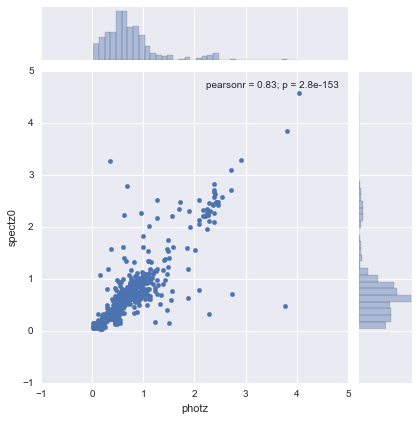

In [22]:
sns.jointplot(x='photz', y='spectz0', data=pandas_photz)

/Users/shupe/miniconda3/envs/course/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


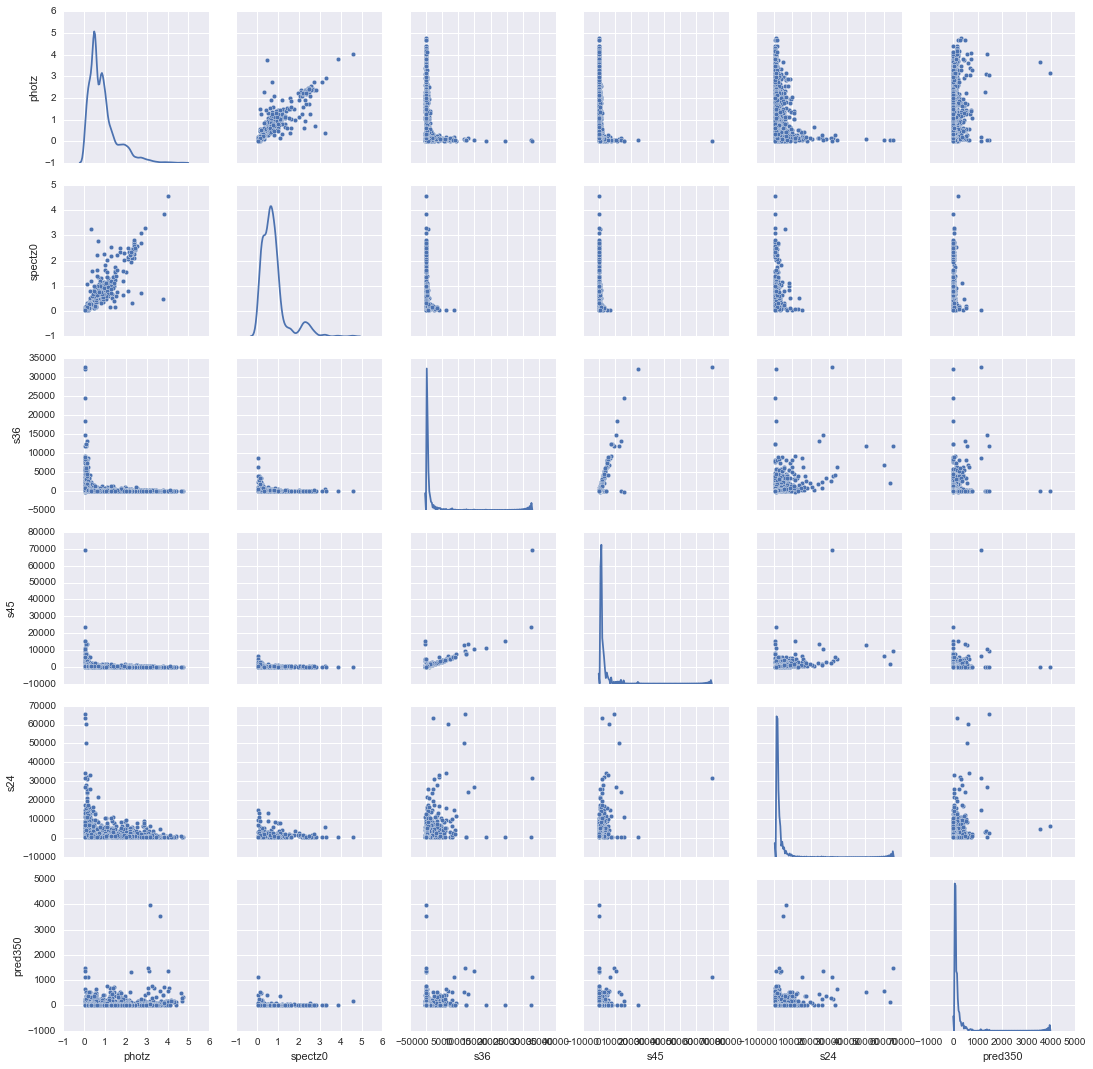

In [23]:
sns.pairplot(pandas_photz, vars=['photz', 'spectz0', 's36', 's45', 's24', 'pred350'], diag_kind='kde')

Facet by nbopt (number of optical bands)

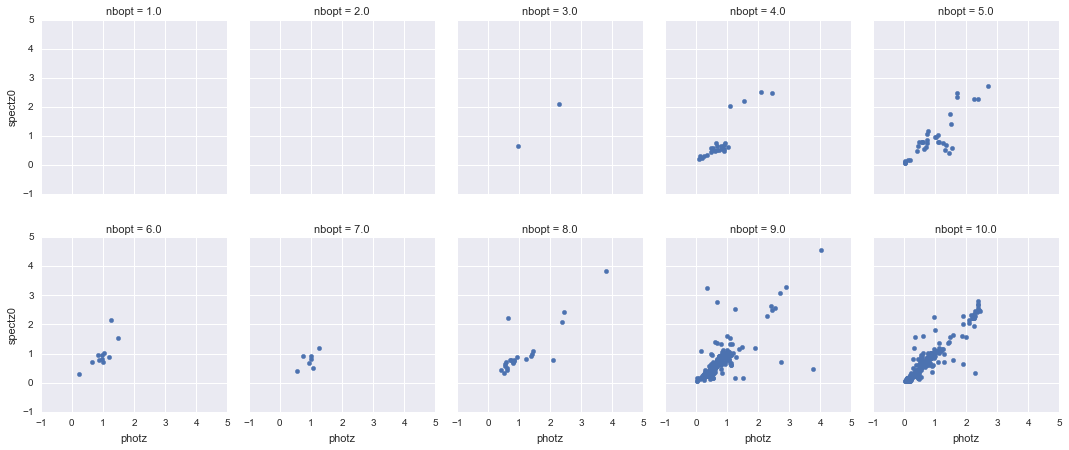

In [24]:
g = sns.FacetGrid(pandas_photz, col="nbopt", col_wrap=5)  
g.map(plt.scatter, "photz", "spectz0")  

# Exercise 1

1. Add a mag3.6 column to pandas_photz using -2.5 x np.log(s36 x u.mJy/(280.9*u.Jy))
2. Add a mag4.5 column to pandas_photz using -2.5 x np.log(s45 x u.mJy / (179.7*u.Jy))
3. Add a mag5.8 column to pandas_photz using a zeropoint of 115.0 Jy.
4. Add a mag8.0 column to pandas_photz using a zeropoint of 64.1 Jy.
5. Make a color-color scatter plot of mag5.8 - mag8.0 (x-axis), mag3.6 - mag4.5
6. Make the color-color plots faceted by the j2 parameter.

From the readme for MRR's catalog:
j2(i3), optical template type (1-11 galaxies, 13-30 QSOs) for free $A_V$  solution
[j1=13-15, 16-18, 19-21, 22-24, 25-27, 28-30, correspond to $L_tor/L_opt$ = 0, 0.2, 0.4, 0.6, 0.8, 1.]

# Coordinates and table matching

* Astropy contained SkyCoord class
* Can match in 2-D or 3-D (adding distances or redshifts)
* Understands Units (i.e. degrees)

We'll match our Herschel-HerMES and Spitzer-photz catalogs

In [25]:
from astropy.coordinates import SkyCoord
cherm = SkyCoord(ra=hermes['RAdeg'],dec=hermes['DEdeg'], frame='icrs')
cmrr = SkyCoord(ra=mrrphotz['ra'], dec=mrrphotz['dec'], frame='icrs')

In [26]:
%time idxmrr, idxhermes, d2d, d3d = cherm.search_around_sky(cmrr, 2*u.arcsec)

CPU times: user 120 ms, sys: 2.98 ms, total: 123 ms
Wall time: 122 ms


* Tables can be stacked vertically or horizontally.
* Here we want to join them horizontally (expand columns)

In [27]:
from astropy.table import hstack
joinedtbl = hstack([mrrphotz[idxmrr],hermes[idxhermes]])

In [28]:
joinedtbl

nidir,nidopt,ra,dec,s36,s45,s58,s8,s24,j2,err1,n91,nbopt,spectz0,nirtem,pred350,pred450,photz,Field,2HERMES,RAdeg,DEdeg,F250,F350,F500,E_F250,E_F350,E_F500
,,deg,deg,uJy,uJy,uJy,uJy,uJy,,,,,,,mJy,mJy,,,,deg,deg,mJy,mJy,mJy,mJy,mJy,mJy
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,int64,float64,float64,float64,str16,str16,float64,float64,float64,float64,float64,float64,float64,float64
56323,8061867.0,36.239571,-4.40839,28.32,32.45,--,38.89,680.13,8,1.352,5,5.0,--,2,1.74,0.83,0.599558028615,L6-XMM-LSS-SWIRE,J022457.4-042430,36.2395,-4.40841,21.28767,27.841919,13.45905,9.693781,7.6748123,6.1806707
41348,9178562.0,36.437222,-4.72148,13.19,16.13,--,--,830.24,6,3.668,6,4.0,--,5,25.7,18.2,2.1477483141,L6-XMM-LSS-SWIRE,J022544.9-044316,36.43715,-4.72135,15.342726,26.436335,20.021503,9.690067,7.673326,6.1709747
171106,9133357.0,36.11401,-4.94401,74.56,63.84,43.16,103.96,612.74,5,16.536,6,4.0,--,2,4.17,2.19,0.92309172891,L6-XMM-LSS-SWIRE,J022427.3-045638,36.11379,-4.94393,7.897357,4.8360167,--,9.688193,7.6747127,6.5623503
54785,8065900.0,36.40015,-4.38958,16.67,21.02,--,--,837.72,4,0.054,4,2.0,--,5,33.11,18.62,1.66685866452,L6-XMM-LSS-SWIRE,J022536.1-042321,36.40057,-4.38925,14.533223,28.678522,20.034195,9.703079,7.6650453,6.2493057
170803,9133259.0,36.132801,-4.94507,109.32,85.74,63.0,95.68,1181.53,5,56.062,9,9.0,--,2,7.24,3.89,0.931968317017,L6-XMM-LSS-SWIRE,J022431.8-045640,36.1329,-4.94468,45.073654,28.517683,14.261786,9.700192,7.6780047,6.212393
29045,9133622.0,36.631069,-4.94397,42.33,53.92,54.98,87.7,1275.24,11,3.944,9,9.0,--,3,257.04,162.18,1.17770977235,L6-XMM-LSS-SWIRE,J022631.4-045639,36.6311,-4.94438,12.65912,10.394847,5.12592,9.703374,7.6695166,6.1745763
29506,9134032.0,36.603642,-4.94176,60.15,55.07,58.01,--,554.66,7,8.525,11,9.0,--,2,4.57,2.63,1.06062991327,L6-XMM-LSS-SWIRE,J022624.9-045630,36.60388,-4.94169,12.40548,8.426951,--,9.698725,7.6719623,6.1597524
24450,12144423.0,36.92968,-4.94284,123.65,96.93,132.15,295.96,2728.01,5,2.903,9,9.0,--,2,8.71,4.07,0.534616982799,L6-XMM-LSS-SWIRE,J022743.0-045633,36.92937,-4.94264,95.223175,44.75096,34.271744,9.702167,7.6948514,6.318


What tests are done on coordinates?

Here's how to run the coordinates tests:

# Reading FITS files: simple case

If you just want to read the header and data from a simple FITS file (simple meaning no extensions), you can use the `getdata` method of `astropy.io.fits`

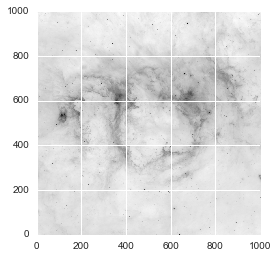

In [29]:
import astropy.io.fits as fits
image = fits.getdata('data/w5.fits')

# Some scaling for better display
from astropy.visualization import scale_image
import matplotlib.pylab as plt
%matplotlib inline
plt.imshow(scale_image(image,scale='log'),origin="lower",cmap='Greys')

You can get the header with the `getheader` method, or together with the data using `getheader`:

In [30]:
image, header = fits.getdata('data/w5.fits', header=True)
header

SIMPLE  =                    T / Written by SkyView Mon Sep 24 16:13:12 EDT 2012
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                 1000 / Width of image                                 
NAXIS2  =                 1000 / Height of image                                
CRVAL1  =                43.46 / Reference longitude                            
CRVAL2  =                60.38 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                500.5 / X reference pixel                              
CRPIX2  =                500

# Reading multi-extension FITS files

For multi-extension FITS files, it is best to use the `open` method from `astropy.io.fits`.

All Herschel FITS files are multi-extension FITS. Here we read in a Herschel SPIRE 350um image.

In [31]:
import astropy.io.fits as fits
hdulist = fits.open('data/hspirepmw1342192088_afgl4092.fits.gz')

`hdulist` is an HDUList, essentially a list of Header Data Units.

In [32]:
hdulist

An HDUList has a `.info()` method which gives a better description of the contents

In [33]:
hdulist.info()

Filename: data/hspirepmw1342192088_afgl4092.fits.gz
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     162   ()              
1    image       ImageHDU        53   (552, 552)   float64   
2    History     ImageHDU        23   ()              
3    HistoryScript  BinTableHDU     39   109R x 1C    [300A]   
4    HistoryTasks  BinTableHDU     46   80R x 4C     [1K, 27A, 1K, 9A]   
5    HistoryParameters  BinTableHDU     74   613R x 10C   [1K, 20A, 13A, 46A, 1L, 1K, 1L, 74A, 11A, 41A]   
6    error       ImageHDU        53   (552, 552)   float64   
7    coverage    ImageHDU        53   (552, 552)   float64   


An extension can be accessed by name or by number.

In [34]:
hdulist['image'].header

XTENSION= 'IMAGE   '           / Java FITS: Sat Sep 27 04:20:39 CEST 2014       
BITPIX  =                  -64                                                  
NAXIS   =                    2 / Dimensionality                                 
NAXIS1  =                  552                                                  
NAXIS2  =                  552                                                  
PCOUNT  =                    0 / No extra parameters                            
GCOUNT  =                    1 / One group                                      
LONGSTRN= 'OGIP 1.0'           / The OGIP long string convention may be used.   
COMMENT This FITS file may contain long string keyword values that are          
COMMENT continued over multiple keywords.  This convention uses the  '&'        
COMMENT character at the end of a string which is then continued                
COMMENT on subsequent keywords whose name = 'CONTINUE'.                         
          -------------- Her

Let's access the image data by number of the extension.

`scale_image` doesn't play nice with NaNs so let's employ some handy Numpy functions.

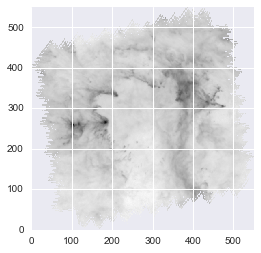

In [35]:
im = hdulist[1].data
plt.imshow(scale_image(im,scale='log',min_cut=np.nanmin(im),\
                       max_cut=np.nanmax(im)),origin='lower',cmap='Greys')

# World Coordinate Systems

Here we'll show how to create a WCS from a FITS header, and convert pixels to world coordinates.

In the next section, we'll create a WCS from scratch.

In [36]:
from astropy.wcs import WCS

In [37]:
w = WCS(hdulist[1].header)
hdulist['image'].header['OBJECT'] = 'M31' 

In [38]:
w.printwcs()

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 44.857117290539598  60.542432837562131  
CRPIX : 278.0  285.0  
NAXIS    : 552 552


Here's how to convert pixels to world coordinates.

* The second argument specifies the convention for the lower left pixel corner.
   * 0 is Numpy and C convention: (0,0) is first pixel
   * 1 is FITS and Fortran convention: (1,1) is first pixel
   * DS9 uses the FITS convention

In [39]:
import numpy as np
           
print(w.all_pix2world(np.array([[169.0,214.0],]),1))
# ds9 display for X=169.0, Y=214.0: alpha=45.46904, delta=60.34381

print(w.all_pix2world(np.array([[168.0,213.0],]),0))

[[ 45.4690432   60.34380633]]
[[ 45.4690432   60.34380633]]


* The calc_footprint method gives the corners in RA, Dec.
* The footprint_to_file method writes out a ds9 regions file.

In [40]:
w.calc_footprint()

array([[ 46.3841356 ,  59.74473731],
       [ 46.4580158 ,  61.27463166],
       [ 43.27354816,  61.27483468],
       [ 43.34662938,  59.74492806]])

# Creating and writing FITS files

We'll create a simple FITS file with a random image and a WCS.

In [41]:
data = np.random.uniform(size=(300,300))
myhdu = fits.PrimaryHDU(data=data)
myhdu.header['OBJECT'] = 'M31'

In [42]:
myhdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  300                                                  
NAXIS2  =                  300                                                  
EXTEND  =                    T                                                  
OBJECT  = 'M31     '                                                            

Let's create a minimal WCS and add it to the header.

In [43]:
from astropy import wcs
w = wcs.WCS(naxis=2)
w.wcs.crpix = [150.,150.]
w.wcs.cdelt = np.array([-1.0/3600.,1.0/3600.])
w.wcs.crval = [165.0,+58.5]
w.wcs.ctype = ["RA---TAN", "DEC--TAN"]

header = w.to_header()
for k in header.keys():
    myhdu.header[k] = header[k]
myhdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  300                                                  
NAXIS2  =                  300                                                  
EXTEND  =                    T                                                  
OBJECT  = 'M31     '                                                            
WCSAXES =                    2                                                  
CRPIX1  =                150.0                                                  
CRPIX2  =                150.0                                                  
CDELT1  = -0.00027777777777778                                                  
CDELT2  =  0.00027777777777778                                                  
CUNIT1  = 'deg     '        

In [44]:
myhdu.writeto('data/random_image_wcs.fits', clobber=True)

Now we'll write a multi-extension FITS with an image and a table.

In [45]:
myimagehdu = fits.ImageHDU(data=myhdu.data, header=myhdu.header, name='image')

Now make up some table data.

In [46]:
npts = 100
tdata = np.dstack((np.linspace(35.0, 70.0, num=npts),np.random.uniform(size=npts)))[0]
tbl = Table(tdata, names=('wavelength','flux'))
tbl['wavelength'].unit = u.um
tbl['flux'].unit = u.Jy
tbl

wavelength,flux
um,Jy
float64,float64
35.0,0.232743626607
35.3535353535,0.268274140748
35.7070707071,0.47503546295
36.0606060606,0.672252113359
36.4141414141,0.178669222009
36.7676767677,0.897678774909
37.1212121212,0.27527455022
37.4747474747,0.182401832528


In [47]:
mytablehdu = fits.BinTableHDU(data=tbl.as_array(),name='spectrum')
mytablehdu.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   16 / length of dimension 1                          
NAXIS2  =                  100 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of table fields                         
TTYPE1  = 'wavelength'                                                          
TFORM1  = 'D       '                                                            
TTYPE2  = 'flux    '                                                            
TFORM2  = 'D       '                                                            
EXTNAME = 'SPECTRUM'        

In [48]:
myhdulist = fits.HDUList([fits.PrimaryHDU(),myimagehdu,mytablehdu])
myhdulist.info()

Filename: (No file associated with this HDUList)
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       4   ()              
1    IMAGE       ImageHDU        23   (300, 300)   float64   
2    SPECTRUM    BinTableHDU     13   100R x 2C    ['D', 'D']   


In [49]:
myhdulist.writeto('data/multiext.fits', clobber=True)

**Note:** the `writeto` method will not ovewrite existing files by default.

To force the overwrite, give the additional parameter `clobber=True`.

# Astroquery affiliated package

The _astroquery_ package is a set of tools for querying astronomical web forms and databases.

Complementary to:
* astropy.vo (Astropy core)
* pyvo (Astropy affiliated package)

Check out the [Gallery of queries](http://astroquery.readthedocs.org/en/latest/gallery.html) for nice examples.

_Astroquery_ includes functions for querying IRSA catalogs.

In [50]:
from astroquery.irsa import Irsa
Irsa.print_catalogs()

com_pccs1_sz_pws                Planck Sunyaev-Zeldovich Cluster PwS List
yson1333obj                     YSOVAR NGC1333 Object Table
cosmos_morph_zurich_1           COSMOS Zurich Structure and Morphology Catalog v1.0
pep500                          PEP SPIRE 500 micron Catalog
servseni12                      SERVS ELAIS N1 2-band Catalog (highly reliable)
ysoi20050obj                    YSOVAR IRAS 20050+2720 Object Table
pt_src_c                        2MASS Calibration Point Source Working Database
servsxmmi2                      SERVS XMM-LSS 4.5 micron Catalog
neowiser_p1bs_frm               NEOWISE-R Single Exposure (L1b) Frame Metadata Table
prelim_p3al_lod                 WISE Preliminary Release Atlas Inventory Table (Superseded)
summary                         IRAS Large Galaxies Catalog
galex_emphot_v3                 GALEX/COSMOS Prior-based Photometry Catalog June 2008
astsight                        IRAS Minor Planet Survey
cosmos_phot                     COSMOS Photometr

Let's read in an image and query an IRSA catalog in that image.

In [51]:
header = fits.getheader('data/xmm-lss-cutout-350um.fits')
w = wcs.WCS(header)
fov = w.calc_footprint()
fov 

array([[ 36.49006706,  -6.05642239],
       [ 36.48415013,  -2.852117  ],
       [ 33.39908956,  -2.85155939],
       [ 33.39132663,  -6.05523471]])

In [52]:
%time xmmtable = Irsa.query_region(catalog='servsxmmi2', spatial='Polygon', polygon=fov*u.deg)

CPU times: user 284 ms, sys: 10.5 ms, total: 295 ms
Wall time: 2.18 s


In [53]:
xmmtable

name,id,ra,dec,clon,clat,flux_aper_1,flux_aper_2,flux_aper_3,flux_aper_4,flux_aper_5,fluxerr_aper_1,fluxerr_aper_2,fluxerr_aper_3,fluxerr_aper_4,fluxerr_aper_5,snr_1,snr_2,snr_3,snr_4,snr_5,flux_iso,flux_auto,fluxerr_iso,fluxerr_auto,snr_iso,snr_auto,kron_radius,class_star,flags,mask,cov,csnr,poly,rel
,,deg,deg,,,microJy,microJy,microJy,microJy,microJy,microJy,microJy,microJy,microJy,microJy,,,,,,microJy,microJy,microJy,microJy,,,pixels,,,,,,,
object,object,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,float64,int32,int32
SERVS1_J022039.96-051607.8,183557,35.166,-5.269,02h20m39.96s,-05d16m07.79s,88.599999999999994,94.400000000000006,104.3,114.7,119.09999999999999,0.5,0.5,0.59999999999999998,0.69999999999999996,1.0,175.30000000000001,189.19999999999999,183.90000000000001,155.09999999999999,122.40000000000001,114.7,113.90000000000001,0.90000000000000002,0.90000000000000002,123.90000000000001,121.59999999999999,3.5,0.38,3,0,21.137,310.80000000000001,1,1
SERVS1_J022046.92-051518.4,183992,35.195,-5.255,02h20m46.91s,-05d15m18.49s,2.6000000000000001,2.7000000000000002,2.8999999999999999,2.7999999999999998,2.2000000000000002,0.29999999999999999,0.29999999999999999,0.40000000000000002,0.59999999999999998,0.80000000000000004,8.0,7.9000000000000004,6.9000000000000004,4.7999999999999998,2.7999999999999998,1.8999999999999999,2.3999999999999999,0.20000000000000001,0.40000000000000002,8.5,6.7999999999999998,3.5,0.64000000000000001,0,130,30.792999999999999,10.800000000000001,1,1
SERVS1_J021828.22-052313.9,183703,34.618,-5.387,02h18m28.23s,-05d23m13.72s,4.0999999999999996,4.4000000000000004,4.9000000000000004,4.9000000000000004,4.7999999999999998,0.29999999999999999,0.29999999999999999,0.40000000000000002,0.59999999999999998,0.80000000000000004,12.4,12.6,11.699999999999999,8.5,6.2999999999999998,4.0999999999999996,4.4000000000000004,0.29999999999999999,0.59999999999999998,12.9,7.0999999999999996,4.6299999999999999,0.01,3,130,30.312999999999999,17.300000000000001,1,1
SERVS1_J022058.72-051435.1,183730,35.245,-5.243,02h20m58.72s,-05d14m35.06s,2.3999999999999999,2.2000000000000002,2.2999999999999998,2.1000000000000001,1.5,0.40000000000000002,0.40000000000000002,0.5,0.69999999999999996,0.90000000000000002,6.2999999999999998,5.5999999999999996,4.5999999999999996,3.2000000000000002,1.7,1.2,1.7,0.20000000000000001,0.29999999999999999,6.7000000000000002,5.0999999999999996,4.2199999999999998,0.52000000000000002,2,2,22.533000000000001,7.5999999999999996,1,1
SERVS1_J021852.57-052146.4,184063,34.719,-5.363,02h18m52.55s,-05d21m46.27s,2.8999999999999999,3.0,3.3999999999999999,3.6000000000000001,2.0,0.5,0.5,0.69999999999999996,0.90000000000000002,1.2,5.5999999999999996,5.5999999999999996,5.2000000000000002,3.8999999999999999,1.7,2.3999999999999999,2.6000000000000001,0.40000000000000002,1.0,6.5999999999999996,2.6000000000000001,4.8600000000000003,0.080000000000000002,2,0,13.025,7.7999999999999998,1,1
SERVS1_J022529.61-045909.0,183742,36.373,-4.986,02h25m29.62s,-04d59m08.68s,1.5,1.7,1.8,1.3999999999999999,0.80000000000000004,0.40000000000000002,0.40000000000000002,0.5,0.69999999999999996,0.90000000000000002,4.0999999999999996,4.2000000000000002,3.6000000000000001,2.0,0.90000000000000002,0.90000000000000002,1.3,0.20000000000000001,0.29999999999999999,4.5,4.0,3.5,0.26000000000000001,0,130,22.212,5.7000000000000002,1,1
SERVS1_J022305.20-050724.7,183897,35.772,-5.124,02h23m05.20s,-05d07m24.62s,2.5,2.5,2.2999999999999998,2.1000000000000001,1.5,0.40000000000000002,0.40000000000000002,0.5,0.69999999999999996,0.90000000000000002,6.5,6.2999999999999998,4.7000000000000002,3.2000000000000002,1.7,1.7,2.0,0.20000000000000001,0.40000000000000002,6.9000000000000004,4.5999999999999996,3.8799999999999999,0.20999999999999999,3,130,22.285,8.5999999999999996,1,1
SERVS1_J022121.38-051326.0,183331,

# Querying WISE images from Skyview

In [54]:
from astroquery.skyview import SkyView

In [55]:
SkyView.list_surveys()

{'DiffuseX-ray': ['RASS Background 1',
                  'RASS Background 2',
                  'RASS Background 3',
                  'RASS Background 4',
                  'RASS Background 5',
                  'RASS Background 6',
                  'RASS Background 7'],
 'GOODS/HDF/CDF(Allwavebands)': ['GOODS: Chandra ACIS HB',
                                 'GOODS: Chandra ACIS FB',
                                 'GOODS: Chandra ACIS SB',
                                 'GOODS: VLT VIMOS U',
                                 'GOODS: VLT VIMOS R',
                                 'GOODS: HST ACS B',
                                 'GOODS: HST ACS V',
                                 'GOODS: HST ACS I',
                                 'GOODS: HST ACS Z',
                                 'Hawaii HDF U',
                                 'Hawaii HDF B',
                                 'Hawaii HDF V0201',
                                 'Hawaii HDF V0401',
                       

In [56]:
import astropy.coordinates as coord
wiseimages = SkyView.get_images(position=coord.SkyCoord(w.wcs.crval[0], w.wcs.crval[1],
                                          unit=(u.deg, u.deg),
                                          frame='icrs'),
                      survey=['WISE 3.4', 'WISE 4.6'], radius=10*u.arcmin, pixels=600)

In [57]:
wiseimages[0][0].header

SIMPLE  =                    T / Written by SkyView Wed Apr 27 20:30:17 GMT 2016
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  600 / Width of image                                 
NAXIS2  =                  600 / Height of image                                
CRVAL1  =                35.15 / Reference longitude                            
CRVAL2  =             -4.52371 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                300.5 / X reference pixel                              
CRPIX2  =                300

# Getting a PTF image and catalog from IRSA's IBE

astroquery includes an ibe module. 

It's not completely built-out yet.

In [58]:
from astroquery.ibe import Ibe

In [59]:
ibe = Ibe()

In [60]:
ibe.list_missions()

/Users/shupe/miniconda3/envs/course/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "html5lib")

  markup_type=markup_type))


['twomass', 'wise', 'ptf']

In [61]:
ibe.list_datasets('ptf')

/Users/shupe/miniconda3/envs/course/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "html5lib")

  markup_type=markup_type))


['images']

In [62]:
ibe.list_tables('ptf', 'images')

/Users/shupe/miniconda3/envs/course/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "html5lib")

  markup_type=markup_type))


['level1', 'level2']

In [63]:
# Uncomment to pop up a webpage
#ibe.show_docs(mission='ptf', dataset='images', table='level2')

True

In [64]:
ptftable = ibe.query_region(where="ptffield=4588 and ccdid=6 and filter='G'", 
                            mission="ptf", dataset="images", table="level1")

In [65]:
ptftable

expid,obsdate,crval1,crval2,filter,ccdid,ptffield,seeing,airmass,moonillf,moonesb,photcalflag,infobits,nid,fieldid,ptfpid,pfilename,afilename1,afilename2,afilename3,afilename4,rfilename,obsmjd,ptfprpi,filtersl,moonra,moondec,moonphas,moonalt,ra1,dec1,ra2,dec2,ra3,dec3,ra4,dec4,gain,readnoi,darkcur,ipac_gid,ipac_pub_date
,,deg,deg,,,,arcsec,,,,,,,,,,,,,,,d,,,deg,deg,deg,,deg,deg,deg,deg,deg,deg,deg,deg,e-/DN,e-,e-/s,,
int64,str26,float64,float64,str1,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,str5,str93,str93,str92,str93,str1,str58,float64,str8,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str19
278312,2012-09-22 02:55:15.929000,313.1197145,43.2302673,G,6,4588,1.96,1.09,0.42,-0.91,0,0,1289,278312,30011,proc/2012/09/22/f1/c6/p5/v1/PTF_201209221217_i_p_scie_t025515_u014113492_f01_p004588_c06.fits,proc/2012/09/22/f1/c6/p5/v1/PTF_201209221217_i_p_mask_t025515_u014113492_f01_p004588_c06.fits,proc/2012/09/22/f1/c6/p5/v1/PTF_201209221217_i_p_scie_t025515_u014113492_f01_p004588_c06.jpg,proc/2012/09/22/f1/c6/p5/v1/PTF_201209221217_c_p_scie_t025515_u014113492_f01_p004588_c06.ctlg,--,raw/2012/09/22/f01/multiExt/PTF201209221217_1_o_48653.fits,56192.1217,Kulkarni,2,259.24736,-21.899117,98.93,28.18,312.5739497,43.8064108,313.3699666,43.8197537,313.3995678,42.6692055,312.6188865,42.6569874,1.8,5.0,0.1,100,2015-08-07 00:00:00
268653,2012-08-14 05:15:04.179000,313.1196987,43.2306261,G,6,4588,1.94,1.11,-0.12,0.0,0,0,1250,268653,30011,proc/2012/08/14/f1/c6/p5/v1/PTF_201208142188_i_p_scie_t051504_u013866061_f01_p004588_c06.fits,proc/2012/08/14/f1/c6/p5/v1/PTF_201208142188_i_p_mask_t051504_u013866061_f01_p004588_c06.fits,proc/2012/08/14/f1/c6/p5/v1/PTF_201208142188_i_p_scie_t051504_u013866061_f01_p004588_c06.jpg,proc/2012/08/14/f1/c6/p5/v1/PTF_201208142188_c_p_scie_t051504_u013866061_f01_p004588_c06.ctlg,--,raw/2012/08/14/f01/multiExt/PTF201208142188_1_o_37589.fits,56153.2188,Kulkarni,2,101.346791,19.126409,221.18,-37.4,312.5728394,43.8075873,313.3689235,43.8209847,313.3985336,42.670372,312.6178197,42.6581594,1.8,5.0,0.1,100,2015-08-07 00:00:00
276943,2012-09-18 04:36:37.829000,313.1197135,43.230554,G,6,4588,2.44,1.02,0.06,0.0,0,0,1285,276943,30011,proc/2012/09/18/f1/c6/p5/v1/PTF_201209181921_i_p_scie_t043637_u014077362_f01_p004588_c06.fits,proc/2012/09/18/f1/c6/p5/v1/PTF_201209181921_i_p_mask_t043637_u014077362_f01_p004588_c06.fits,proc/2012/09/18/f1/c6/p5/v1/PTF_201209181921_i_p_scie_t043637_u014077362_f01_p004588_c06.jpg,proc/2012/09/18/f1/c6/p5/v1/PTF_201209181921_c_p_scie_t043637_u014077362_f01_p004588_c06.ctlg,--,raw/2012/09/18/f01/multiExt/PTF201209181921_1_o_47163.fits,56188.19209,Kulkarni,2,200.205125,-12.392195,152.0,-23.05,312.57461,43.8136313,313.3707178,43.8270365,313.400505,42.6764757,312.619805,42.6642401,1.8,5.0,0.1,100,2015-08-07 00:00:00
270458,2012-08-24 08:53:08.179000,313.1197575,43.2305977,G,6,4588,1.79,1.14,0.48,0.0,0,0,1260,270458,30011,proc/2012/08/24/f1/c6/p5/v1/PTF_201208243702_i_p_scie_t085308_u013909673_f01_p004588_c06.fits,proc/2012/08/24/f1/c6/p5/v1/PTF_201208243702_i_p_mask_t085308_u013909673_f01_p004588_c06.fits,proc/2012/08/24/f1/c6/p5/v1/PTF_201208243702_i_p_scie_t085308_u013909673_f01_p004588_c06.jpg,proc/2012/08/24/f1/c6/p5/v1/PTF_201208243702_c_p_scie_t085308_u013909673_f01_p004588_c06.ctlg,--,raw/2012/08/24/f01/multiExt/PTF201208243702_1_o_39669.fits,56163.37023,Kulkarni,2,235.77854,-20.432552,92.57,-30.42,312.5700735,43.8147004,313.3662244,43.8281779,313.3962488,42.6776342,312.6154789,42.6653203,1.8,5.0,0.1,100,2015-08-07 00:00:00
275472,2012-09-13 04:40:17.529000,313.1197137,43.2306949,G,6,4588,1.76,1.03,-0.1,0.0,0,0,1280,275472,30011,proc/2012/09/13/f1/c6/p5/v1/PTF_201209131946_i_p_scie_t044017_u014039176_f01_p004588_c06.fits,proc/2012/09/13/f1/c6/p5/v1/PTF_201209131946_i_p_mask_t044017_u014039176_f01_p004588_c06.fits,proc/2012/09/13/f1/c6/p5/v1/PTF_201209131946_i_p_scie_t044017_u014039176_f01_p004

Getting the data isn't fully built-out in astroquery.ibe.

We have to construct the URLs.

In [66]:
imhdulist = fits.open(ibe.URL + 'data/ptf/images/level1/' +
    ptftable['pfilename'][0])
imhdulist.info()

Filename: /Users/shupe/.astropy/cache/download/fdf02f26384bb6127d7262e0b87739f0
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     370   (2048, 4096)   float32   


In [67]:
scatalog = Table.read(ibe.URL + 'data/ptf/images/level1/' +
    ptftable['afilename3'][0])

In [68]:
cathdulist = fits.open(ibe.URL + 'data/ptf/images/level1/' +
    ptftable['afilename3'][0])

In [69]:
cathdulist.filename()

'/Users/shupe/.astropy/cache/download/f663438b809e026f5f4ae184fd59d23a'

In [70]:
cathdulist[0].header

SIMPLE  =                    T / This is a FITS file                            
BITPIX  =                    8 /                                                
NAXIS   =                    0 /                                                
EXTEND  =                    T / This file may contain FITS extensions          
EPOCH   =               0.0000                                                  
OBJECT  = '        '                                                            
ORIGIN  = 'SExtractor'                                                          
CRVAL1  =      0.000000000E+00 / WORLD X COORD. OF REFERENCE PIXEL              
CRVAL2  =      0.000000000E+00 / WORLD Y COORD. OF REFERENCE PIXEL              
CRPIX1  =                    1 / IMAGE X COORD. OF REFERENCE PIXEL              
CRPIX2  =                    1 / IMAGE Y COORD. OF REFERENCE PIXEL              
CDELT1  =      0.000000000E+00 / WORLD PIXEL STEP ALONG X                       
CDELT2  =      0.000000000E+

In [114]:
scatalog.colnames

['NUMBER',
 'FLAGS',
 'XWIN_IMAGE',
 'YWIN_IMAGE',
 'X_WORLD',
 'Y_WORLD',
 'XPEAK_IMAGE',
 'YPEAK_IMAGE',
 'ERRTHETAWIN_IMAGE',
 'DELTAWIN_J2000',
 'X2WIN_IMAGE',
 'Y2WIN_IMAGE',
 'XYWIN_IMAGE',
 'AWIN_WORLD',
 'BWIN_WORLD',
 'MAG_ISO',
 'MAGERR_ISO',
 'MAG_AUTO',
 'MAGERR_AUTO',
 'MAG_ISOCOR',
 'MAGERR_ISOCOR',
 'MAG_APER',
 'MAGERR_APER',
 'MAG_PETRO',
 'MAGERR_PETRO',
 'MAG_BEST',
 'MAGERR_BEST',
 'MU_THRESHOLD',
 'MU_MAX',
 'BACKGROUND',
 'THRESHOLD',
 'ALPHAWIN_J2000',
 'THETAWIN_IMAGE',
 'THETAWIN_J2000',
 'ELONGATION',
 'ISOAREA_WORLD',
 'ISOAREAF_WORLD',
 'ISO0',
 'ISO1',
 'ISO2',
 'ISO3',
 'ISO4',
 'ISO5',
 'ISO6',
 'ISO7',
 'FWHM_IMAGE',
 'KRON_RADIUS',
 'PETRO_RADIUS',
 'CLASS_STAR',
 'FLUX_BEST',
 'FLUXERR_BEST',
 'FLUX_AUTO',
 'FLUXERR_AUTO',
 'FLUX_ISO',
 'FLUXERR_ISO',
 'FLUX_APER',
 'FLUXERR_APER',
 'X_IMAGE',
 'Y_IMAGE',
 'X2_IMAGE',
 'Y2_IMAGE',
 'XY_IMAGE',
 'THETA_IMAGE',
 'ERRAWIN_IMAGE',
 'ERRBWIN_IMAGE',
 'THETAWIN_WORLD',
 'ERRX2WIN_IMAGE',
 'ERRY2WIN_IMAGE',
 

# APLpy for visualizing images and catalogs

* Python module for producing publication-quality plots of FITS data
* Based on matplotlib
* Can create output files in several graphical formats
* Make plots interactively or using scripts

/Users/shupe/miniconda3/envs/course/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


INFO: Auto-setting vmin to  3.860e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.066e+03 [aplpy.core]


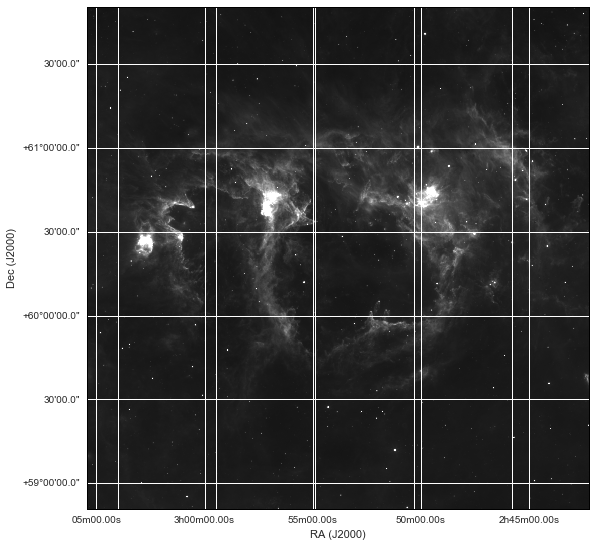

In [72]:
%matplotlib inline
import aplpy
fig = aplpy.FITSFigure('data/w5.fits')
fig.show_grayscale()

We'll read in a catalog and overlay it on the image, along with a grid and some contours.

In [73]:
w5tbl = Table.read('data/w5_wise.tbl', format='ascii.ipac')
w5tbl = w5tbl[w5tbl['w4snr'] > 30.0] 

/Users/shupe/miniconda3/envs/course/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


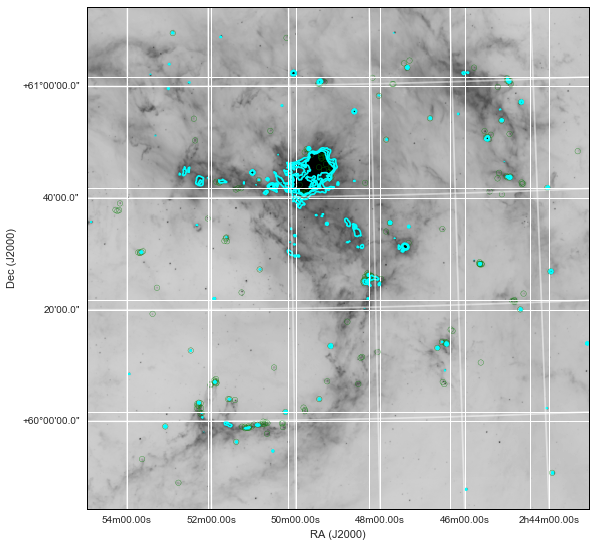

In [74]:
fig = aplpy.FITSFigure('data/w5.fits')
fig.show_grayscale(stretch='log', vmin=370, vmax=1000.0, invert=True)
fig.show_contour(colors='cyan', levels=[750, 850, 950])
fig.add_grid()
fig.show_markers(w5tbl['ra'], w5tbl['dec'], edgecolor='green',\
                 facecolor='none', marker='o', s=30, alpha=1.0)
fig.recenter(np.mean(w5tbl['ra']),np.mean(w5tbl['dec']), width=1.5, height=1.5)

In [75]:
fig.save('w5_overlay.pdf')

INFO: Auto-setting resolution to 71.6846 dpi [aplpy.core]


/Users/shupe/miniconda3/envs/course/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/Users/shupe/miniconda3/envs/course/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


INFO: Auto-setting vmin to  1.934e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.598e+03 [aplpy.core]


/Users/shupe/miniconda3/envs/course/lib/python3.5/site-packages/aplpy/wcs_util.py:515: UserWarning: Pixels are not square, using an average pixel scale
  warnings.warn("Pixels are not square, using an average pixel scale")


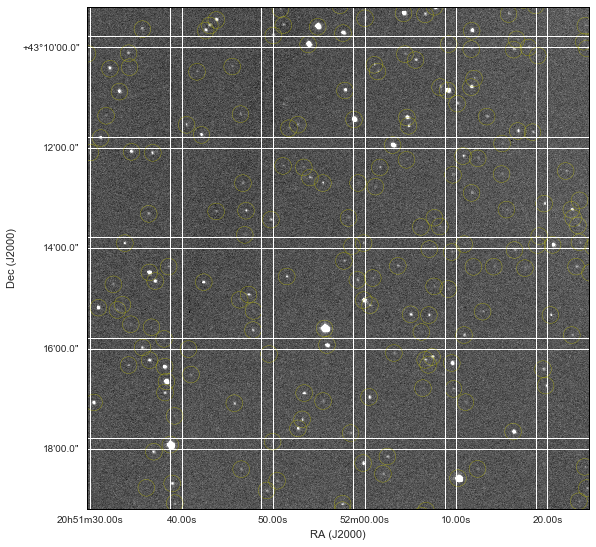

In [126]:
%matplotlib inline
fig = aplpy.FITSFigure(imhdulist)
fig.show_grayscale()
fig.show_circles(scatalog['X_WORLD'], scatalog['Y_WORLD'], 10/3600., edgecolor='y')
fig.recenter(312.9905104637555, 43.238368976952245, radius=300/3600.)

/Users/shupe/miniconda3/envs/course/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


INFO: Auto-setting vmin to -1.510e+00 [aplpy.core]
INFO: Auto-setting vmax to  6.308e+01 [aplpy.core]


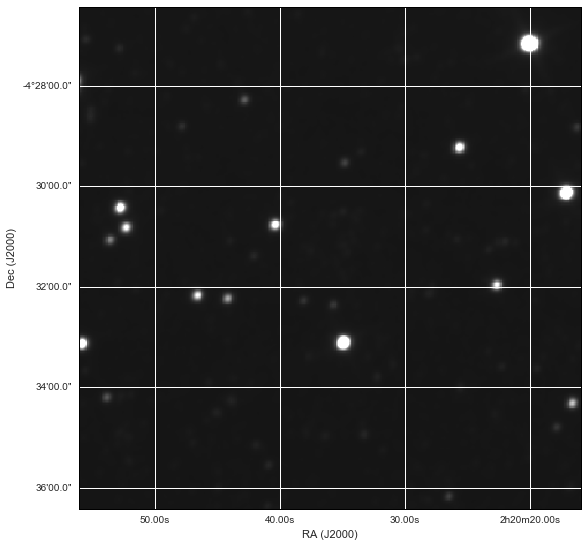

In [77]:
fig = aplpy.FITSFigure(wiseimages[0][0])
fig.show_grayscale()

# Ginga for image display

* Toolkit for building viewers for scientific (esp. astronomical) data in Python
* Written and maintained by s/w engineers at the Subaru Telescope, NAOJ
* Image display object
* Plugin-based; highly customizable

Installing Ginga will put `ginga` in your command path (same location as python).

This is the "reference viewer" which we can run from the command line.

In [78]:
## Not run:
##!ginga ./data/w5.fits

Ginga can be run from the notebook.

To show some of Ginga's interactive capabilities, we will follow an excerpt of [this online notebook](http://nbviewer.jupyter.org/gist/ejeschke/6067409).

* Start up a viewer
* Retrieve coordinates from it
* Draw a rectangle
* Find objects in the rectangle and overplot

In [79]:
#%gui qt
#import time
#time.sleep(5)

In [80]:
# setup
from ginga.web.pgw import ipg
# Set this to True if you have a non-buggy python OpenCv bindings--it greatly speeds up some operations
use_opencv = False

server = ipg.make_server(host='localhost', port=9915, use_opencv=use_opencv)

In [81]:
# Start viewer server
# IMPORTANT: if running in an IPython/Jupyter notebook, use the no_ioloop=True option
server.start(no_ioloop=True)

In [82]:
# Get a viewer
# This will get a handle to the viewer v1 = server.get_viewer('v1')
v1 = server.get_viewer('v1')

In [83]:
# where is my viewer
v1.url

'http://localhost:9915/app?id=v1'

In [84]:
v1.load(imhdulist.filename())

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [85]:
v1.set_color_map('gray')

In [86]:
# Set cut level algorithm to use
v1.set_autocut_params('zscale', contrast=0.25)
# Auto cut levels on the image
v1.auto_levels()

In [87]:
# Example of embedding a viewer
v1.embed(height=650)

Now set a pan position by shift-clicking somewhere in the window.

In [88]:
dx, dy = v1.get_pan()
dx, dy

(1024.0, 2048.0)

In [89]:
img = v1.get_image()
img.pixtoradec(dx,dy)

(312.9905104637555, 43.238368976952245)

In [90]:
img.pixtoradec(dx, dy, format='str')

('20:51:57.723', '+43:14:18.13')

In [91]:
v1.set_autocut_params('zscale', contrast=0.1)
v1.auto_levels()

In [92]:
# set a color map on the viewer 
from ginga import cmap
v1.set_cmap(cmap.get_cmap('ramp'))

Add a drawing canvas

In [93]:
canvas = v1.add_canvas()
canvas.set_drawtype('rectangle')

In [94]:
canvas.deleteAllObjects()

Mark a rectangle on the image, including some objects.

In [95]:
input("Press enter, then go back up and draw a rectangle")

Press enter after drawing a rectangle


''

In [97]:
input("Press enter after drawing a rectangle")

Press enter after drawing a rectangle


''

In [98]:
# Find approximate bright peaks in a sub-area
from ginga.util import iqcalc
iq = iqcalc.IQCalc()

img = v1.get_image()
r = canvas.objects[0]
data = img.cutout_data(min(r.x1,r.x2), min(r.y1,r.y2), max(r.x1,r.x2), max(r.y1,r.y2))
peaks = iq.find_bright_peaks(data)
peaks[:20]

/Users/shupe/miniconda3/envs/course/lib/python3.5/site-packages/ginga/BaseImage.py:160: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return self._get_data()[view]


[(54.0, 0.0),
 (67.0, 2.0),
 (103.0, 2.0),
 (273.0, 3.0),
 (719.0, 4.0),
 (726.0, 5.0),
 (311.0, 16.0),
 (481.0, 21.0),
 (654.0, 26.0),
 (560.0, 33.0),
 (560.0, 40.0),
 (362.0, 41.0),
 (192.0, 50.0),
 (10.0, 53.0),
 (470.0, 56.0),
 (226.0, 57.0),
 (359.0, 64.0),
 (210.0, 65.0),
 (224.0, 67.0),
 (697.0, 71.0)]

In [99]:
# evaluate peaks to get FWHM, center of each peak, etc.
objs = iq.evaluate_peaks(peaks, data)
# how many did we find with standard thresholding, etc.
# see params for find_bright_peaks() and evaluate_peaks() for details
len(objs)

/Users/shupe/miniconda3/envs/course/lib/python3.5/site-packages/ginga/util/iqcalc.py:213: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xarr = data[y, x0:x1+1]
/Users/shupe/miniconda3/envs/course/lib/python3.5/site-packages/ginga/util/iqcalc.py:214: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  yarr = data[y0:y1+1, x]
/Users/shupe/miniconda3/envs/course/lib/python3.5/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)


181

In [100]:
# example of what is returned
o1 = objs[0]
o1 

{'objx': 53.63093556701808, 'y': 0, 'background': 2149.6240234375, 'brightness': 240195335.487013, 'pos': 0.928998126663162, 'fwhm_x': 3.4465828077703633, 'skylevel': 2297.105224609375, 'fwhm_radius': 15, 'objy': -24.396338872187513, 'fwhm_y': 11.230538133620628, 'x': 54, 'elipse': 0.3068938252791645, 'fwhm': 8.306741834844916}

In [101]:
# pixel coords are for cutout, so add back in x1, y1 to get full data coords
# RA, DEC of first object
img.pixtoradec(min(r.x1,r.x2)+o1.objx, min(r.y1,r.y2)+o1.objy)

(312.7941758898688, 43.33474259570702)

In [102]:
# Draw circles around all objects
Circle = canvas.get_draw_class('circle')
for obj in objs:
    x, y = min(r.x1,r.x2)+obj.objx, min(r.y1,r.y2)+obj.objy
    if r.contains(x, y):
        canvas.add(Circle(x, y, radius=10, color='yellow'))
        
# set pan and zoom to center
v1.set_pan((r.x1+r.x2)/2, (r.y1+r.y2)/2)
v1.scale_to(2.0, 2.0)

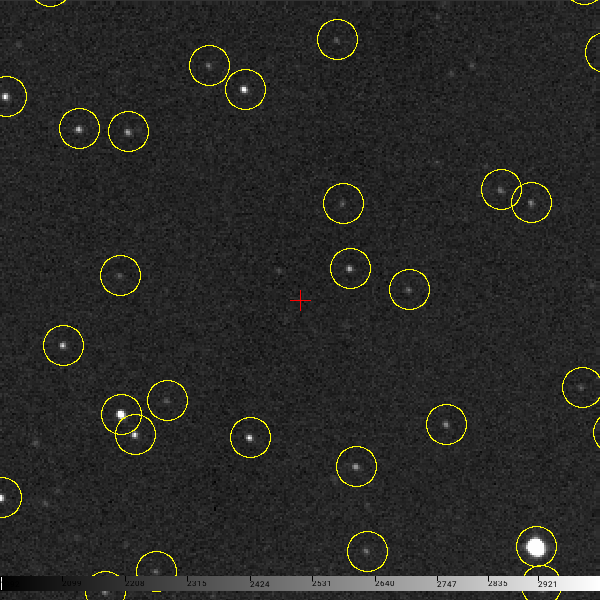

In [103]:
 v1.show() 

# Exercises 2

1. Read in the file `data/xmm-lss-cutout-350um.fits`
2. Display it in aplpy
3. Overlay the sources from joinedtbl with pred350 > 100 mJy, in green
4. Overlay the sources from joinedtbl with F350 > 100 mJy, in blue
5. (Advanced) Repeat 2-5 in Ginga


# Photometry with photutils

In [104]:
import photutils

First remove the background

In [105]:
from photutils.background import Background
bkg = Background(imhdulist[0].data, (50, 50), filter_shape=(3, 3), method='sextractor')

In [106]:
print(bkg.background_median)
print(bkg.background_rms_median)

2152.40199405
31.0658736474


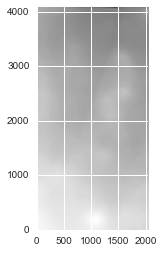

In [107]:
plt.imshow(bkg.background, origin='lower', cmap='Greys_r')

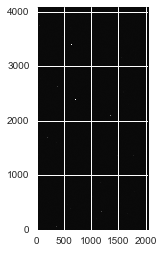

In [108]:
subtracted = imhdulist[0].data - bkg.background
plt.imshow(subtracted, origin='lower', cmap='Greys_r')

In [109]:
from photutils import daofind
from astropy.stats import sigma_clipped_stats
mean, median, std = sigma_clipped_stats(subtracted, sigma=3.0, iters=5)
sources = daofind(subtracted, fwhm=3.0, threshold=5.*std)

In [110]:
sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,1145.40050462,1.6408044687,0.888107439931,-0.365950314004,-0.985701801517,25.0,0.0,202.543367441,1.23892542238,-0.232612911572
2,2046.93985811,1.34960797922,0.836588859275,0.450479320723,0.441755018114,25.0,0.0,905.675034096,4.60200496688,-1.65736770765
3,-0.263732652129,2.6997862073,0.506121197548,0.565904340691,0.167037516663,25.0,0.0,128.257479872,1.02710662844,-0.0290388298827
4,66.8556187588,2.48929374348,0.408228359206,-0.392572651521,-0.523483634577,25.0,0.0,87.2395472544,1.44962915024,-0.403142283854
5,1076.65038935,1.61281492539,0.431255710272,0.406311380174,-0.525741686694,25.0,0.0,97.1186828416,1.20016143192,-0.198099165693
6,1557.71067915,2.35037852042,0.351581326766,-0.922552004076,-0.869926958442,25.0,0.0,69.6375586344,1.03484491077,-0.0371881705114
7,1838.58855872,3.39342138708,0.526229850014,0.315772866895,-0.0091750836832,25.0,0.0,3579.06425637,19.1920243339,-3.20780196402
8,60.2825921058,6.08610283299,0.495314605451,0.44591548709,0.0608098058702,25.0,0.0,299.911517783,1.6590374918,-0.549640501378
9,1514.08783769,6.10452514004,0.523193013658,-0.493275387535,-0.000193485136503,25.0,0.0,545.600063155,2.94666156413,-1.17332564564


In [111]:
scatalog

NUMBER,FLAGS,XWIN_IMAGE,YWIN_IMAGE,X_WORLD,Y_WORLD,XPEAK_IMAGE,YPEAK_IMAGE,ERRTHETAWIN_IMAGE,DELTAWIN_J2000,X2WIN_IMAGE,Y2WIN_IMAGE,XYWIN_IMAGE,AWIN_WORLD,BWIN_WORLD,MAG_ISO,MAGERR_ISO,MAG_AUTO,MAGERR_AUTO,MAG_ISOCOR,MAGERR_ISOCOR,MAG_APER [5],MAGERR_APER [5],MAG_PETRO,MAGERR_PETRO,MAG_BEST,MAGERR_BEST,MU_THRESHOLD,MU_MAX,BACKGROUND,THRESHOLD,ALPHAWIN_J2000,THETAWIN_IMAGE,THETAWIN_J2000,ELONGATION,ISOAREA_WORLD,ISOAREAF_WORLD,ISO0,ISO1,ISO2,ISO3,ISO4,ISO5,ISO6,ISO7,FWHM_IMAGE,KRON_RADIUS,PETRO_RADIUS,CLASS_STAR,FLUX_BEST,FLUXERR_BEST,FLUX_AUTO,FLUXERR_AUTO,FLUX_ISO,FLUXERR_ISO,FLUX_APER [5],FLUXERR_APER [5],X_IMAGE,Y_IMAGE,X2_IMAGE,Y2_IMAGE,XY_IMAGE,THETA_IMAGE,ERRAWIN_IMAGE,ERRBWIN_IMAGE,THETAWIN_WORLD,ERRX2WIN_IMAGE,ERRY2WIN_IMAGE,ERRXYWIN_IMAGE,FLUX_RADIUS [5],IMAFLAGS_ISO,NIMAFLAGS_ISO,ERRAWIN_WORLD,ERRBWIN_WORLD,ERRTHETAWIN_WORLD,A_IMAGE,ERRA_IMAGE,B_IMAGE,ERRB_IMAGE,A_WORLD,ERRA_WORLD,B_WORLD,ERRB_WORLD,ERRTHETA_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,AWIN_IMAGE,BWIN_IMAGE,FLUX_PETRO,FLUXERR_PETRO,ZEROPOINT
,,pix,pix,deg,deg,pix,pix,deg,deg,pix2,pix2,pix2,deg,deg,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag / arcsec2,mag / arcsec2,ct,ct,deg,deg,deg,,deg2,deg2,pix2,pix2,pix2,pix2,pix2,pix2,pix2,pix2,pix,,,,ct,ct,ct,ct,ct,ct,ct,ct,pix,pix,pix2,pix2,pix2,deg,pix,pix,deg,pix2,pix2,pix2,pix,,,deg,deg,deg,pix,pix,pix,pix,deg,deg,deg,deg,deg,pix2,pix2,pix2,pix,pix,ct,ct,
int32,int16,float64,float64,float64,float64,int32,int32,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float32,float32,float32,float32,float64,float64,float64,float32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float32,float32,float32,float32,float32
1,4,1082.44968676,201.830577745,312.996026218,43.7576111137,1087,207,49.8956,43.7575721736,17.6932261614,28.4461415912,3.04563586486,0.00152117,0.00115116,-17.9098,0.000248539,-17.8952,0.000224538,-17.9119,0.000251322,-10.6402 .. -16.1586,0.0148812 .. 0.000557926,-17.907,0.000247074,-17.8952,0.000224538,-3.90624,-11.8533,2302.49,46.4939,312.996020408,75.2347,-15.8522,2.02167,0.000181036,0.000242903,2416,1377,621,441,335,299,275,250,39.6075,2.5,4.62,0.835624,1.43901e+07,2975.25,1.43901e+07,2975.25,1.4585e+07,3337.87,18034.1 .. 2.90694e+06,247.116 .. 1493.42,1082.47,201.692,22.8005035388,86.754636294,9.08241569728,82.072,0.00101694,0.000911817,-74.1478,9.15547077767e-07,9.5002692453e-07,9.99005854759e-08,5.47866 .. 20.9638,450,1145,2.85654e-07,2.55923e-07,-49.5932,9.38187,0.00241629,4.64066,0.00209236,0.00263925,6.79232e-07,0.00129605,5.86784e-07,81.901,4.40694697348e-06,5.80946884129e-06,2.03709193673e-07,5.40822,4.10981,1.45479e+07,3309.77,26.6871
2,0,770.948294747,14.7862721753,312.873332602,43.8080515133,771,15,-54.9288,43.8080410469,0.538657724461,0.542103550381,-0.00891454359628,0.00020811,0.000204596,-10.0733,0.0200054,-10.0511,0.0190394,-10.1225,0.0220199,-8.93373 .. -10.0889,0.025303 .. 0.0291388,-10.0999,0.0316256,-10.0511,0.0190394,-4.15081,-7.99619,2252.6,47.0614,312.87328154,-50.4693,35.9269,1.02618,2.20392e-06,2.59748e-06,28,25,20,15,10,8,6,3,2.26683,2.5,4.62,0.980544,10482.3,183.772,10482.3,183.772,10698.5,197.079,3745.33 .. 10853.6,87.2636 .. 291.217,771.081,14.7522,1.41525730162,1.46746799833,-0.0265621124134,-67.2516,0.0104932,0.0104496,54.0731,0.000109495329076,0.000109805766714,-4.29782292796e-07,0.804674 .. 2.94885,2,30,2.94677e-06,2.93232e-06,65.5122,1.21598,0.0307309,1.18496,0.0284257,0.000341498,8.63022e-06,0.000332502,7.97705e-06,-76.6924,0.000815247884999,0.000937160377912,-3.05448506317e-05,0.741256,0.728904,10964.2,319.29,26.6487
3,

In [112]:
from photutils import CircularAperture
positions = np.vstack([sources['xcentroid'], sources['ycentroid']])
apertures = CircularAperture(positions, r=3.)

In [113]:
from photutils import aperture_photometry
phot_table = aperture_photometry(subtracted, apertures)
phot_table

aperture_sum,xcenter,ycenter
,pix,pix
float64,float64,float64
-212.119966553,1145.40050462,1.6408044687
2350.11230783,2046.93985811,1.34960797922
344.671313303,-0.263732652129,2.6997862073
-909.323597781,66.8556187588,2.48929374348
-490.828088169,1076.65038935,1.61281492539
-107.097019998,1557.71067915,2.35037852042
27490.2154831,1838.58855872,3.39342138708
2297.9194538,60.2825921058,6.08610283299
